In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


In [2]:
df_orders = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv")[["order_id","customer_id","order_status","order_purchase_timestamp"]]

In [3]:
df_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp  
0    delivered      2017-10-02 10:56:33  
1    delivered      2018-07-24 20:41:37  
2    delivered      2018-08-08 08:38:49  
3    delivered      2017-11-18 19:28:06  
4    delivered      2018-02-13 21:18:39

In [4]:
df_orders.groupby(['order_status']).agg({'order_status': 'count'})

order_status
order_status              
approved                 2
canceled               625
created                  5
delivered            96478
invoiced               314
processing             301
shipped               1107
unavailable            609

In [5]:
df_orders.count()

order_id                    99441
customer_id                 99441
order_status                99441
order_purchase_timestamp    99441
dtype: int64

In [6]:
df_orders = df_orders[df_orders["order_status"] == "delivered"]

In [7]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  96478 non-null  object
 1   customer_id               96478 non-null  object
 2   order_status              96478 non-null  object
 3   order_purchase_timestamp  96478 non-null  object
dtypes: object(4)
memory usage: 3.7+ MB


In [8]:
df_order_items = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv")

In [9]:
df_order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [10]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [11]:
df_order_items["monetary"] = df_order_items["price"] + df_order_items["freight_value"]

In [12]:
df_order_items = df_order_items[["order_id","order_item_id","product_id","monetary"]]

In [13]:
df_order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id  monetary  
0  4244733e06e7ecb4970a6e2683c13e61     72.19  
1  e5f2d52b802189ee658865ca93d83a8f    259.83  
2  c777355d18b72b67abbeef9df44fd0fd    216.87  
3  7634da152a4610f1595efa32f14722fc     25.78  
4  ac6c3623068f30de03045865e4e10089    218.04

In [14]:
df_products = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv")[["product_id","product_category_name"]]

In [15]:
df_products.head()

product_id  product_category_name
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer
3  cef67bcfe19066a932b7673e239eb23d                  bebes
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas

In [16]:
df_products.count()

product_id               32951
product_category_name    32341
dtype: int64

In [17]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [18]:
df_customers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv")

In [19]:
df_customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [20]:
df = (
    df_orders
    .join(
        df_order_items.set_index("order_id"),
        on="order_id",
        how="left"
    )
    .join(
        df_products.set_index("product_id"),
        on="product_id",
        how="left"
    )
    .join(
        df_customers.set_index("customer_id"),
        on="customer_id",
        how="left"
    )
)

In [21]:
df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp  order_item_id  \
0    delivered      2017-10-02 10:56:33              1   
1    delivered      2018-07-24 20:41:37              1   
2    delivered      2018-08-08 08:38:49              1   
3    delivered      2017-11-18 19:28:06              1   
4    delivered      2018-02-13 21:18:39              1   

                         product_id  monetary  product_category_name  \
0  87285b34884572647811a353c7ac498a     38.71  utilidades_domesticas   
1  595fac2a385ac33a80bd5114aec74eb8    141.46             perfumaria   
2  aa4383b373c6aca5d8797843e5594415    179.12             automotivo   
3  d0b61bfb1de832b15ba9d266ca96e5b0     72.20               pet_shop   
4  65266b2da20d04dbe00c5c2d3bb7859e     28.62              papelaria   

                 customer_unique_id  customer_zip_code_prefix  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149   
1  af07308b275d755c9edb36a90c618231                     47813   
2  3a653a41f6f9fc3d2a113cf8398680e8                     75265   
3  7c142cf63193a1473d2e66489a9ae977                     59296   
4  72632f0f9dd73dfee390c9b22eb56dd6                      9195   

             customer_city customer_state  
0                sao paulo             SP  
1                barreiras             BA  
2               vianopolis             GO  
3  sao goncalo do amarante             RN  
4              santo andre             SP

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110197 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  110197 non-null  object 
 1   customer_id               110197 non-null  object 
 2   order_status              110197 non-null  object 
 3   order_purchase_timestamp  110197 non-null  object 
 4   order_item_id             110197 non-null  int64  
 5   product_id                110197 non-null  object 
 6   monetary                  110197 non-null  float64
 7   product_category_name     108660 non-null  object 
 8   customer_unique_id        110197 non-null  object 
 9   customer_zip_code_prefix  110197 non-null  int64  
 10  customer_city             110197 non-null  object 
 11  customer_state            110197 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 10.9+ MB


In [23]:
import datetime

In [24]:
df["order_purchase"] = pd.to_datetime(df['order_purchase_timestamp'], format="ISO8601").apply(lambda x: x.date())

In [25]:
df = df[["order_id","customer_id","customer_unique_id","order_purchase","order_item_id","product_id","monetary","product_category_name"]]

In [26]:
df["product_category_name"] = df["product_category_name"].fillna("without identification")

In [27]:
df.to_csv("customer_segmentation.csv")

## R - recency

In [28]:
max_date = df["order_purchase"].max()

In [29]:
max_date

datetime.date(2018, 8, 29)

In [30]:
df_recency = df.groupby("customer_unique_id").agg({"order_purchase": "max"}).reset_index()

In [31]:
df_recency.head(10)

customer_unique_id order_purchase
0  0000366f3b9a7992bf8c76cfdf3221e2     2018-05-10
1  0000b849f77a49e4a4ce2b2a4ca5be3f     2018-05-07
2  0000f46a3911fa3c0805444483337064     2017-03-10
3  0000f6ccb0745a6a4b88665a16c9f078     2017-10-12
4  0004aac84e0df4da2b147fca70cf8255     2017-11-14
5  0004bd2a26a76fe21f786e4fbd80607f     2018-04-05
6  00050ab1314c0e55a6ca13cf7181fecf     2018-04-20
7  00053a61a98854899e70ed204dd4bafe     2018-02-28
8  0005e1862207bf6ccc02e4228effd9a0     2017-03-04
9  0005ef4cd20d2893f0d9fbd94d3c0d97     2018-03-12

In [32]:
df_recency["max_date"] = max_date

In [33]:
df_recency["recency"] = df_recency["max_date"] - df_recency["order_purchase"]
df_recency["recency"] = df_recency["recency"].apply(lambda x: x.days)

In [34]:
df_recency.sort_values(by="recency", ascending=True).head()

customer_unique_id order_purchase    max_date  recency
33812  5c58de6fb80e93396e2f35642666b693     2018-08-29  2018-08-29        0
46739  7febafa06d9d8f232a900a2937f04338     2018-08-29  2018-08-29        0
4587   0c6d7218d5f3fa14514fd29865269993     2018-08-29  2018-08-29        0
13433  24ac2b4327e25baf39f2119e4228976a     2018-08-29  2018-08-29        0
66821  b701bebbdf478f5500348f03aff62121     2018-08-29  2018-08-29        0

In [35]:
df_recency = df_recency[["customer_unique_id","recency"]]

## F - frequency

In [36]:
df_frequency = df.groupby("customer_unique_id").agg({"order_id": "count"}).rename({"order_id": "frequency"}, axis=1).reset_index()

In [37]:
df_frequency.sort_values(by="frequency", ascending=False).head()

customer_unique_id  frequency
73127  c8460e4251689ba205045f3ea17884a1         24
25309  4546caea018ad8c692964e3382debd19         21
38579  698e1cf81d01a3d389d96145f7fa6df8         20
71566  c402f431464c72e27330a67f7b94d4fb         20
5622   0f5ac8d5c31de21d2f25e24be15bbffb         18

## M - monetary

In [38]:
df_monetary = df.groupby("customer_unique_id").agg({"monetary": "sum"}).reset_index()

In [39]:
df_monetary.head()

customer_unique_id  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f     27.19
2  0000f46a3911fa3c0805444483337064     86.22
3  0000f6ccb0745a6a4b88665a16c9f078     43.62
4  0004aac84e0df4da2b147fca70cf8255    196.89

## V - variety

In [40]:
df_variety = df.groupby("customer_unique_id").agg({"product_id": "nunique", "product_category_name": "nunique"}).rename({"product_id": "product_variety", "product_category_name": "category_variety"}, axis=1).reset_index()

In [41]:
df_variety.sort_values(by="product_variety", ascending=False).head()

customer_unique_id  product_variety  category_variety
51431  8d50f5eadf50201ccdcedfb9e2ac8455               14                 4
22779  3e43e6105506432c953e165fb2acf44c               13                 5
73921  ca77025e7201e3b30c44b472ff346268                9                 4
10060  1b6c7548a2a1f9037c1fd3ddfed95f33                9                 5
73378  c8ed31310fc440a3f8031b177f9842c3                8                 1

## RFMV

In [42]:
df_rfmv = (
    df_recency
    .join(
        df_frequency.set_index("customer_unique_id"),
        on="customer_unique_id",
        how="inner"
    )
    .join(
        df_monetary.set_index("customer_unique_id"),
        on="customer_unique_id",
        how="inner"
    )
    .join(
        df_variety.set_index("customer_unique_id"),
        on="customer_unique_id",
        how="inner"
    )
)

In [43]:
df_rfmv.head()

customer_unique_id  recency  frequency  monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   product_variety  category_variety  
0                1                 1  
1                1                 1  
2                1                 1  
3                1                 1  
4                1                 1

In [44]:
df_rfmv.describe(percentiles=[.2, .4, .6, .8])[4:]

recency  frequency   monetary  product_variety  category_variety
20%     92.0        1.0     55.240              1.0               1.0
40%    177.0        1.0     87.350              1.0               1.0
50%    218.0        1.0    107.780              1.0               1.0
60%    268.0        1.0    132.642              1.0               1.0
80%    382.0        1.0    208.532              1.0               1.0
max    713.0       24.0  13664.080             14.0               5.0

In [45]:
cols_to_normalize = df_rfmv.columns[1:]

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
for col in cols_to_normalize:
    x_max = df_rfmv[col].max()
    x_min = df_rfmv[col].min()
    
    df_rfmv[col] = df_rfmv[col].apply(lambda x: (x - x_min)/(x_max - x_min))

In [48]:
df_rfmv.describe()

recency     frequency      monetary  product_variety  \
count  93358.000000  93358.000000  93358.000000     93358.000000   
mean       0.333070      0.007842      0.011394         0.005296   
std        0.214018      0.026994      0.016573         0.024378   
min        0.000000      0.000000      0.000000         0.000000   
25%        0.159888      0.000000      0.003912         0.000000   
50%        0.305750      0.000000      0.007191         0.000000   
75%        0.485273      0.000000      0.012664         0.000000   
max        1.000000      1.000000      1.000000         1.000000   

       category_variety  
count      93358.000000  
mean           0.006510  
std            0.042905  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000

In [49]:
df_rfmv.head()

customer_unique_id   recency  frequency  monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2  0.155680        0.0  0.009690   
1  0000b849f77a49e4a4ce2b2a4ca5be3f  0.159888        0.0  0.001289   
2  0000f46a3911fa3c0805444483337064  0.753156        0.0  0.005612   
3  0000f6ccb0745a6a4b88665a16c9f078  0.450210        0.0  0.002492   
4  0004aac84e0df4da2b147fca70cf8255  0.403927        0.0  0.013717   

   product_variety  category_variety  
0              0.0               0.0  
1              0.0               0.0  
2              0.0               0.0  
3              0.0               0.0  
4              0.0               0.0

## Método do cotovelo

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
min_number_of_clusters = 2
max_number_of_clusters = 10

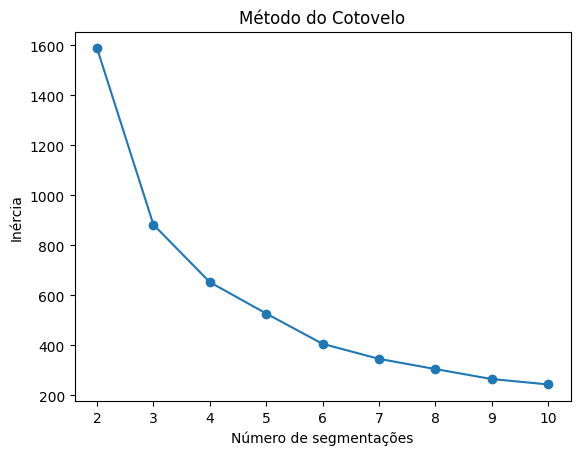

In [52]:
from sklearn.cluster import KMeans

inertias = []

for i in range(min_number_of_clusters, max_number_of_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, max_iter=500)
    kmeans.fit(df_rfmv[df_rfmv.columns[1:]])
    inertias.append(kmeans.inertia_)

plt.plot(range(min_number_of_clusters, max_number_of_clusters + 1), inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de segmentações')
plt.ylabel('Inércia')
plt.show()

In [53]:
inertias

[1588.0050622128651,
 882.9040336043622,
 653.016145095848,
 527.5013646644031,
 406.2781371910869,
 346.2023767157981,
 305.36147793590266,
 265.42619481530755,
 243.8498692746419]

In [54]:
from math import sqrt

def get_optimal_number_of_clusters(inertias):
    x1, y1 = min_number_of_clusters, inertias[0]
    x2, y2 = max_number_of_clusters, inertias[-1]
    
    distances = []
    
    for i in range(len(inertias)):
        x0 = i+2
        y0 = inertias[i]

        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
        
    return distances.index(max(distances)) + 2

In [55]:
n = get_optimal_number_of_clusters(inertias)

In [56]:
n

4

In [57]:
kmeans = KMeans(n_clusters=n, random_state=42, max_iter=500)
clusters = kmeans.fit_predict(df_rfmv[df_rfmv.columns[1:]])

In [58]:
df_rfmv["cluster"] = clusters

In [59]:
df_rfmv.groupby("cluster").agg({"customer_unique_id": "count"}).rename({"customer_unique_id": "count"}, axis=1).head()    

count
cluster       
0        16542
1        27073
2        25431
3        24312

In [60]:
df_rfmv.columns

Index(['customer_unique_id', 'recency', 'frequency', 'monetary',
       'product_variety', 'category_variety', 'cluster'],
      dtype='object')

In [61]:
import plotly.express as px

fig = px.scatter_3d(df_rfmv, x='recency', y='frequency', z='monetary',
              color='cluster')
fig.show()